# Google Ngrams Exploratory Analysis - decomposition
This notebook explore the google 1grams dataset retrieved and cleant from the retrieve_google_1grams.py program.
It is composed of about 500 000 unique words with the attested frequency from 1800 to 2009.

## Timeseries Decomposition
### Time Series Components
A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.

Systematic: Components of the time series that have consistency or recurrence and can be described and modeled.
Non-Systematic: Components of the time series that cannot be directly modeled.
A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:
- Level: The average value in the series.
- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Noise: The random variation in the series.

### Combining Time Series Components
A series is thought to be an aggregate or combination of these four components. All series have a level and noise. The trend and seasonality components are optional.

It is helpful to think of the components as combining either additively or multiplicatively.

#### Additive Model
An additive model suggests that the components are added together as follows:

y(t) = Level + Trend + Seasonality + Noise


An additive model is linear where changes over time are consistently made by the same amount.

A linear trend is a straight line.

A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

#### Multiplicative Model
A multiplicative model suggests that the components are multiplied together as follows:

y(t) = Level * Trend * Seasonality * Noise

A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.

A nonlinear trend is a curved line.

A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

## References
https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788
https://towardsdatascience.com/time-series-in-python-part-2-dealing-with-seasonal-data-397a65b74051

https://otexts.com/fpp2/decomposition.html
http://www.statsoft.com/Textbook/Time-Series-Analysis

## Scientific Goals
- decompose into the four components the evolution of several word through the google ngram data (1800-2010)

- try to interpret the results




## First import required modules

In [1]:
import requests
import sys, csv,re, random, glob,os
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import matplotlib
import seaborn as sns                            # more plots
from sklearn.metrics import mean_absolute_error


## then load dataset

In [2]:
if os.path.isfile('./fre-all_1gram1799-2009.csv'):
    print("Loading the 1 gram big file...")
    df= pd.read_csv('./fre-all_1gram1799-2009.csv', header=0, sep=',', error_bad_lines=False, index_col=0)
else:
    print("Please first launch retrieve_google_1grams.py to generate fre-all_1gram.csv")
    exit()

df.info()
df.head()


Loading the 1 gram big file...
<class 'pandas.core.frame.DataFrame'>
Index: 551079 entries, aaa to зрения
Columns: 210 entries, 1800 to 2009
dtypes: float64(210)
memory usage: 887.1+ MB


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
string,,,,,,,,,,,,,,,,,,,,,
aaa,21.0,38.0,39.0,29.0,36.0,19.0,40.0,32.0,21.0,29.0,...,40.0,80.0,80.0,60.0,59.0,78.0,111.0,65.0,68.0,107.0
aaaa,6.0,16.0,11.0,16.0,11.0,10.0,4.0,32.0,6.0,7.0,...,19.0,66.0,15.0,17.0,44.0,35.0,36.0,114.0,75.0,78.0
aaaaa,2.0,10.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,11.0,...,4.0,29.0,1.0,3.0,8.0,9.0,6.0,7.0,8.0,9.0
aaaaaa,0.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,...,6.0,4.0,3.0,0.0,5.0,3.0,2.0,4.0,6.0,2.0
aaaaaaa,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,...,1.0,8.0,3.0,0.0,1.0,1.0,0.0,2.0,2.0,2.0


## With relative frequency

In [33]:
if os.path.isfile('./google_ngrams_with_freq_rel.csv'):
    print("Loading the 1 gram big file...")
    dfrel= pd.read_csv('./google_ngrams_with_freq_rel.csv', header=0, sep=',', error_bad_lines=False, index_col=0)
else:
    print("Please first launch retrieve_google_1grams.py to generate fre-all_1gram.csv")
    exit()

dfrel.drop('total_count', axis=1,  inplace=True)
dfrel.info()
dfrel.head()


Loading the 1 gram big file...
<class 'pandas.core.frame.DataFrame'>
Index: 549653 entries, aab to зрения
Columns: 209 entries, 1800 to 2008
dtypes: float64(209)
memory usage: 880.6+ MB


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
string,,,,,,,,,,,,,,,,,,,,,
aab,0.00001,0.000000,0.000104,0.000029,0.000017,0.000017,0.0,0.000291,0.0,0.0,...,0.000020,0.000026,0.000008,7.324472e-06,7.762448e-06,0.000019,3.471075e-05,0.000007,2.314650e-06,0.000018
aaba,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000002,0.000005,0.000004,8.138302e-07,4.657469e-06,0.000000,8.264463e-07,0.000007,4.629300e-06,0.000000
aabaab,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000005,0.000004,0.000000,1.627660e-06,7.762448e-07,0.000000,3.305785e-06,0.000002,0.000000e+00,0.000005
aabb,0.00001,0.000007,0.000000,0.000000,0.000008,0.000000,0.0,0.000000,0.0,0.0,...,0.000004,0.000005,0.000006,1.302128e-05,6.986203e-06,0.000015,2.148760e-05,0.000007,3.086200e-06,0.000009
aabccb,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000013,0.000003,0.000002,1.627660e-06,2.328734e-06,0.000002,1.652893e-06,0.000004,7.715501e-07,0.000005


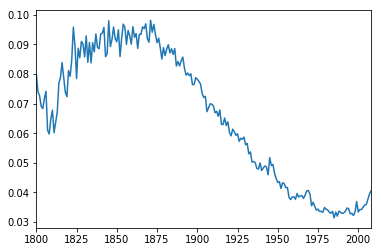

In [35]:
series = df.loc['arriver']
series.plot()

count    209.000000
mean       0.065345
std        0.022452
min        0.031387
25%        0.041325
50%        0.067760
75%        0.087104
max        0.098150
Name: arriver, dtype: float64

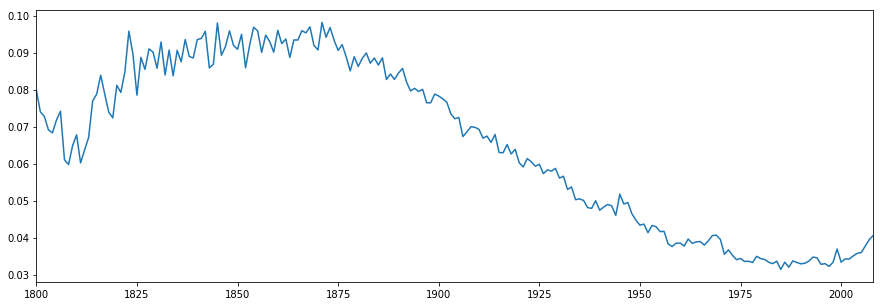

In [46]:
# With dfrel : relative frequency data
seriesrel = dfrel.loc['arriver']
seriesrel.plot(figsize=(15,5))
seriesrel.describe()

In [55]:
# transform to df
ts = pd.DataFrame({'data':seriesrel.values}, index=seriesrel.index) # 'year':seriesrel.index, 
ts.describe()
#ts.head()

,data
count,209.000000
mean,0.065345
std,0.022452
min,0.031387
25%,0.041325
50%,0.067760
75%,0.087104
max,0.098150


### Assessing stationarity with moving average, standard deviation etc.

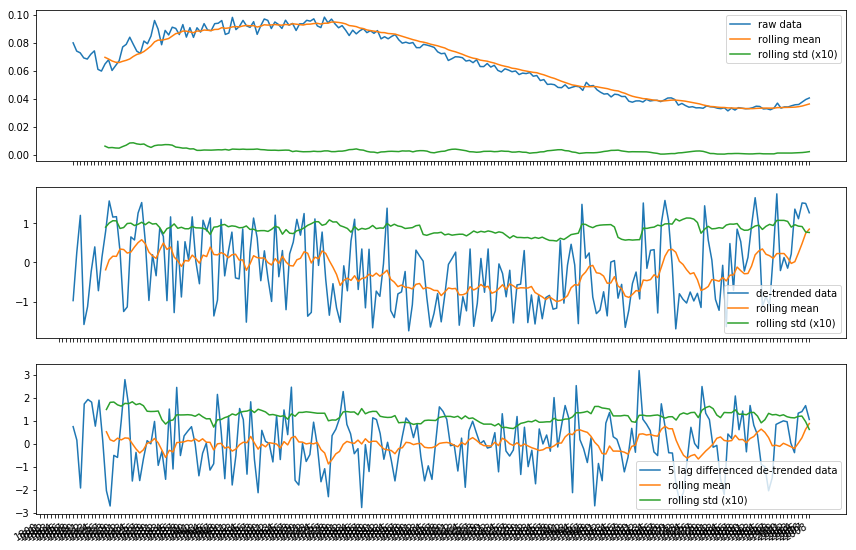

In [59]:
# definition of plot for all measures
def plot_rolling(df,window=10):
    fig, ax = plt.subplots(3,figsize=(12, 9))
    ax[0].plot(df.index, df.data, label='raw data')
    ax[0].plot(df.data.rolling(window=window).mean(), label="rolling mean");
    ax[0].plot(df.data.rolling(window=window).std(), label="rolling std (x10)");
    ax[0].legend()

    ax[1].plot(df.index, df.z_data, label="de-trended data")
    ax[1].plot(df.z_data.rolling(window=window).mean(), label="rolling mean");
    ax[1].plot(df.z_data.rolling(window=window).std(), label="rolling std (x10)");
    ax[1].legend()

    ax[2].plot(df.index, df.zp_data, label="5 lag differenced de-trended data")
    ax[2].plot(df.zp_data.rolling(window=window).mean(), label="rolling mean");
    ax[2].plot(df.zp_data.rolling(window=window).std(), label="rolling std (x10)");
    ax[2].legend()

    plt.tight_layout()
    fig.autofmt_xdate()
    
# prepare ts
ts['z_data'] = (ts['data'] - ts.data.rolling(window=5).mean()) / ts.data.rolling(window=5).std()
ts['zp_data'] = ts['z_data'] - ts['z_data'].shift(5)
plot_rolling(ts,window=10)
#ts.head(10)

### Ad-fuhler test

In [60]:
from statsmodels.tsa.stattools import adfuller

def adfuler_test(df):
    print(" > Is the data stationary ?")
    dftest = adfuller(df.data, autolag='AIC')
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

    print("\n > Is the de-trended data stationary ?")
    dftest = adfuller(df.z_data.dropna(), autolag='AIC')
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

    print("\n > Is the 12-lag differenced de-trended data stationary ?")
    dftest = adfuller(df.zp_data.dropna(), autolag='AIC')
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
        
adfuler_test(ts)

 > Is the data stationary ?
Test statistic = -0.826
P-value = 0.811
Critical values :
	1%: -3.4645146202692527 - The data is not stationary with 99% confidence
	5%: -2.8765564361715534 - The data is not stationary with 95% confidence
	10%: -2.5747745328940375 - The data is not stationary with 90% confidence

 > Is the de-trended data stationary ?
Test statistic = -3.647
P-value = 0.005
Critical values :
	1%: -3.4636447617687436 - The data is  stationary with 99% confidence
	5%: -2.8761761179270766 - The data is  stationary with 95% confidence
	10%: -2.57457158581854 - The data is  stationary with 90% confidence

 > Is the 12-lag differenced de-trended data stationary ?
Test statistic = -6.479
P-value = 0.000
Critical values :
	1%: -3.4662005731940853 - The data is  stationary with 99% confidence
	5%: -2.8772932777920364 - The data is  stationary with 95% confidence
	10%: -2.575167750182615 - The data is  stationary with 90% confidence


### Autocorrelation Plots (ACF, PACF)

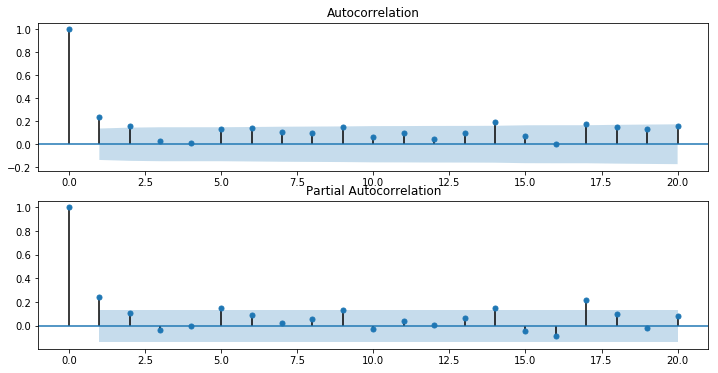

In [62]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(ts.z_data.dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(ts.z_data.dropna(), ax=ax[1], lags=20)

## Choosing a model 
## non-stationarity : smoothing methods
Simple Exponential Smoothing
When to use? Few data points, Irregular data, No seasonality or trend.

Math behind
Just keep in mind that SES only has one component called level (with a smoothing parameter denoted as “alpha” below). It is a weighted average of the previous level and the current observation:


Holt’s Linear Smoothing
When to use? Trend in data, No seasonality.

Math behind
The forecast is made of a level component and a trend component

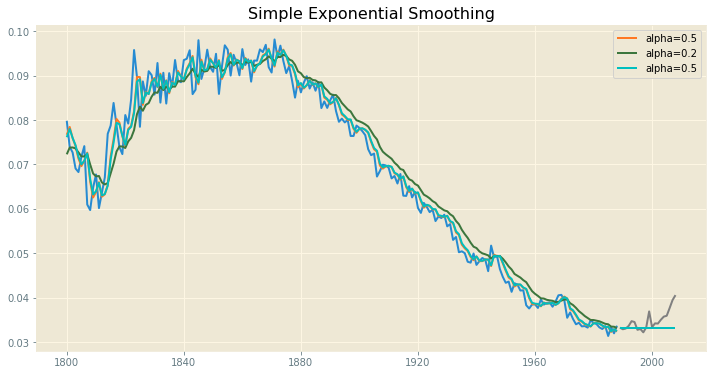

In [71]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
import numpy as np
%matplotlib inline
#plt.style.use('Solarize_Light2')
df = pd.DataFrame({'data':seriesrel.values}, index=seriesrel.index) # 'year':seriesrel.index, 

#df = pd.DataFrame(seriesrel['data'], columns=['time','data']).set_index('time')
train = df.iloc[0:-20, :]
test = df.iloc[-20:, :]
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)
pred = test.copy()

model = SimpleExpSmoothing(np.asarray(train['data']))
model._index = pd.to_datetime(train.index)

fit1 = model.fit()
pred1 = fit1.forecast(19)
fit2 = model.fit(smoothing_level=.2)
pred2 = fit2.forecast(19)
fit3 = model.fit(smoothing_level=.5)
pred3 = fit3.forecast(19)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index, train.values)# [150:]
ax.plot(test.index, test.values, color="gray")
for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(train.index, f.fittedvalues, color=c)
    ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:3], color=c)
plt.title("Simple Exponential Smoothing")    
plt.legend();

### Simpler : Moving average / Exponential Moving Average


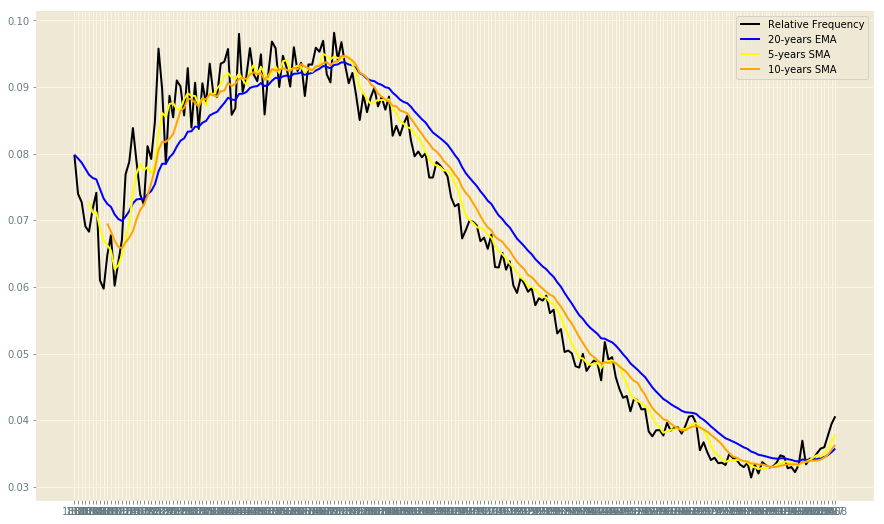

In [110]:
import matplotlib.dates as mdates
# Calculating the long-window simple moving average
long_rolling = df.rolling(window=20).mean()
short_rolling = df.rolling(window=5).mean()
short_rolling2 = df.rolling(window=10).mean()
# Using Pandas to calculate a 5 years span EMA. adjust=False specifies that we are interested in the recursive calculation mode.
ema_short = df.ewm(span=20, adjust=False).mean()
ema_short_adj = df.ewm(span=20, adjust=True).mean()


fig, ax = plt.subplots(figsize=(15,9))

ax.plot(df, label='Relative Frequency', color='black')
ax.plot(ema_short, label = '20-years EMA', color='blue')
ax.plot(short_rolling, label = '5-years SMA', color='yellow')
ax.plot(short_rolling2, label = '10-years SMA', color='orange')

ax.legend(loc='best')
# format the ticks
#ax.xaxis.set_major_locator(mdates.YearLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#fig.autofmt_xdate()
#plt.xticks(rotation=70)

## Seasonal decomposition
Explanation

# test for stationarity
Before going any further into our analysis, our series has to be made stationary.
Stationarity is the property of exhibiting constant statistical properties (mean, variance, autocorrelation, etc.). If the mean of a time-series increases over time, then it’s not stationary.

### additive model

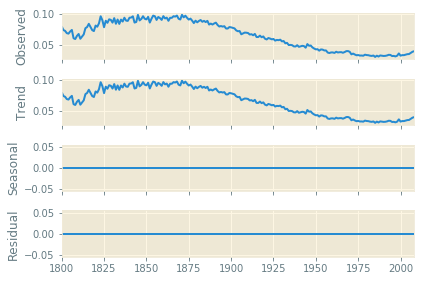

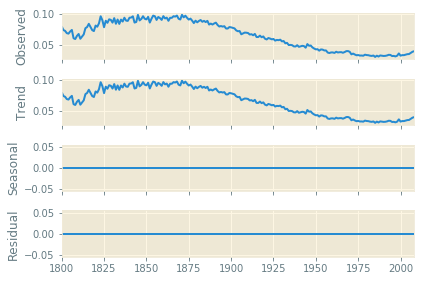

In [112]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
#fig, ax = plt.subplots(1,1,figsize = (20,20))
from statsmodels.tsa.seasonal import seasonal_decompose
#series = df.loc['arriver']
#seriesel = dfrel.loc['arriver']
df = pd.DataFrame({'data':seriesrel.values}, index=seriesrel.index) # 'year':seriesrel.index, 
df2 = pd.DataFrame({'data':series.values}, index=series.index) # 'year':seriesrel.index, 

#series = [i+randrange(10) for i in range(1,100)]
res = seasonal_decompose(df2, model='additive', freq=1)
res.plot()
pyplot.show()
res = seasonal_decompose(df, model='additive', freq=1)
res.plot()
pyplot.show()
#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)

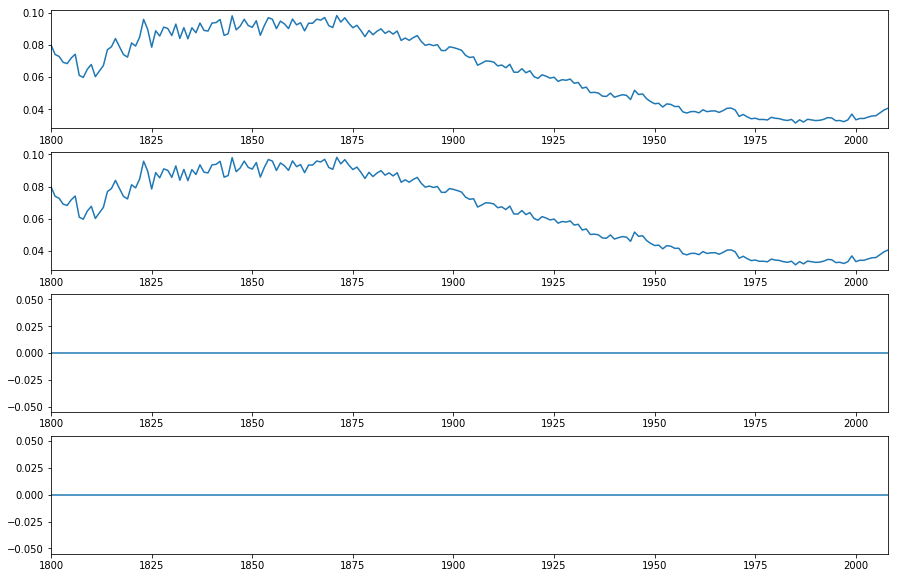

In [40]:
# bigger graph
fig, (ax0,ax1,ax2,ax3) = plt.subplots(4,1, figsize=(15,10))
res.observed.plot(ax=ax0)
res.trend.plot(ax=ax1)
res.resid.plot(ax=ax2)
res.seasonal.plot(ax=ax3)

### Multiplicative

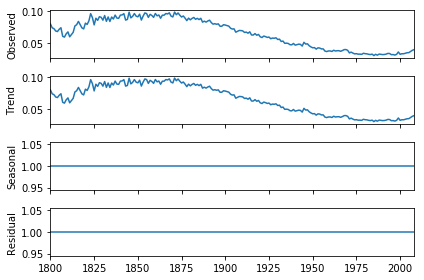

In [41]:
#series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', freq=1)
resplot = result.plot()
pyplot.show()
resplot.savefig('Seasonal_Decompose.png', dpi=150)


In [3]:
# cleaning => TBD : more straighforward solution...
listindex=df.index
listrm = [x for x in listindex if re.search(r"(.)\1{2,}",x)]

df =  df[~(df.index.isin(listrm))]
#df.head(5)
# Converting columns to date : 
#df.astype('datetime64') 
pd.to_datetime(df.columns, format="%Y")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 549653 entries, aab to зрения
Columns: 210 entries, 1800 to 2009
dtypes: float64(210)
memory usage: 884.8+ MB


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
string,,,,,,,,,,,,,,,,,,,,,
aab,1.0,0.0,13.0,4.0,2.0,2.0,0.0,33.0,0.0,0.0,...,31.0,10.0,9.0,10.0,23.0,42.0,9.0,3.0,22.0,6.0
aaba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,5.0,1.0,6.0,0.0,1.0,10.0,6.0,0.0,5.0
aabaab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,2.0,1.0,0.0,4.0,3.0,0.0,6.0,0.0
aabb,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6.0,7.0,16.0,9.0,18.0,26.0,9.0,4.0,11.0,17.0
aabccb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,2.0,3.0,3.0,2.0,5.0,1.0,6.0,2.0


## load yearly corpus stats (total words)

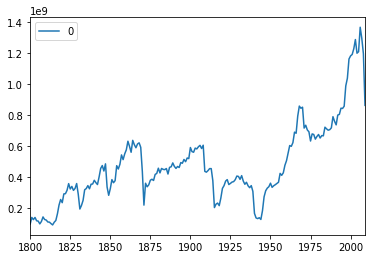

In [5]:
# compare with google stats per year
def load_total_counts(corpus_id, start_year, end_year):
    '''
    This function loads the total counts for a given corpus from Google's source data.
    '''

    # map from id to url
    id_to_url= {
    15: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-eng-all-totalcounts-20120701.txt',
    17: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-eng-us-all-totalcounts-20120701.txt',
    18: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-eng-gb-all-totalcounts-20120701.txt',
    16: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-eng-fiction-all-totalcounts-20120701.txt',
    23: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-chi-sim-all-totalcounts-20120701.txt',
    19: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-fre-all-totalcounts-20120701.txt',
    20: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-ger-all-totalcounts-20120701.txt',
    24: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-heb-all-totalcounts-20120701.txt',
    22: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-ita-all-totalcounts-20120701.txt',
    25: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-rus-all-totalcounts-20120701.txt',
    21: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-spa-all-totalcounts-20120701.txt'
    }

    hdr='Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv:10.0) Gecko/20100101 Firefox/10.0'
    headers={'User-Agent':hdr}
    resp = requests.get(id_to_url[corpus_id],headers=headers)
    resp.raise_for_status()
    response = resp.text
    #print(response)
    #response = urllib2.urlopen(urllib2.Request(id_to_url[corpus_id]))

    #total_counts = []
    total_counts2 = {}
    data = response.split("\t")
    for row in data:
        #print (row)
        #continue
        # first and last rows are empty, so a try...except is needed
        try:
            year, word_count, _, _ = row.split(',')
            #print(start_year)
            #print(end_year)
            #print(year)
            if int(year) >= start_year and int(year) <= end_year:
                #print(year)
                #print(word_count)
                #total_counts.append(int(word_count))
                total_counts2[year]=int(word_count)
                #print(total_counts)

        except ValueError:
            pass
        
    return total_counts2

# load totals of tokens per corpus year
totals = load_total_counts(19,1800,2009)
pd.DataFrame.from_dict(totals, orient='index').plot()

# A. Whole vocabulary and evolution increase/decrease study
## Transpose and convert string index to datetime index 

In [27]:
df1 = df.T # transpose to focus on year features
# Converting columns value to int64
df1.astype('int64') 
# Converting index to date
df1.index = pd.to_datetime(df1.index)

df1.index
df1.head(5)

string,aab,aaba,aabaab,aabb,aabccb,aable,aabne,aac,aacc,aaccepté,...,значительное,значительной,значительную,значительные,значительный,значительных,зон,зоне,зоны,зрения
1800-01-01,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1801-01-01,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1802-01-01,13.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1803-01-01,4.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1804-01-01,2.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Plot vocabulary size per year
### First Unique values count and Sum of occurrences (warning : long process)

In [28]:
# count and sum of all column values
df1['uniquewords'] = df1[df1>0].count(axis=1)
df1['totalwordsocc'] = df1.drop('uniquewords', axis=1).sum(axis=1)
df1['RateUniqueOcc'] = (df1['uniquewords'] / df1['totalwordsocc']) * 1000

In [ ]:

# simple plots
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize = (20,20))
df1['uniquewords'].plot(ax=ax1, title="Evolution of Unique words per year")
df1['totalwordsocc'].plot(ax=ax2, title="Evolution of total word occurences per year")
df1['RateUniqueOcc'].plot(ax=ax3, title="Evolution of rate of unique words / total occurrences per year")


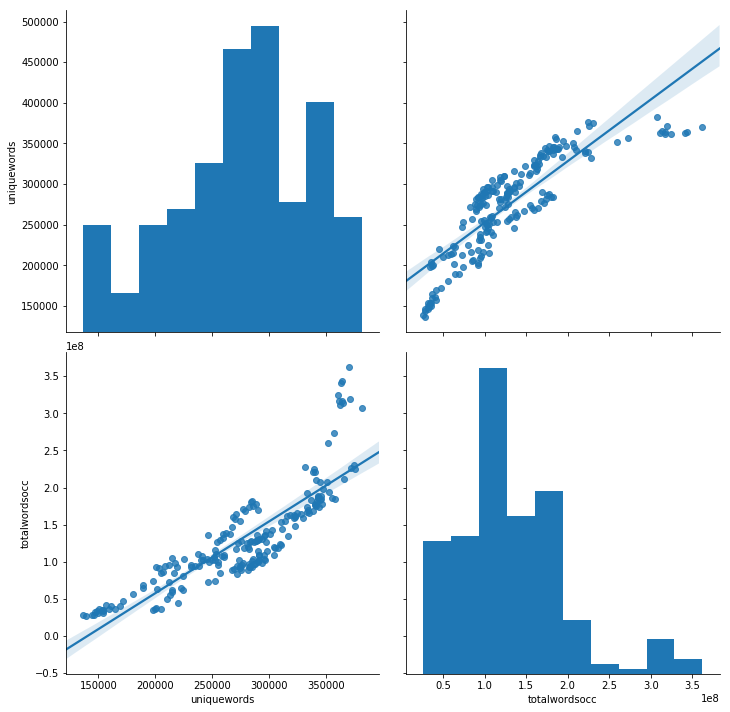

In [31]:
sns.pairplot(df1[['uniquewords','totalwordsocc']], height=5, kind="reg")

Text(0, 0.5, 'Total of word occurrences')

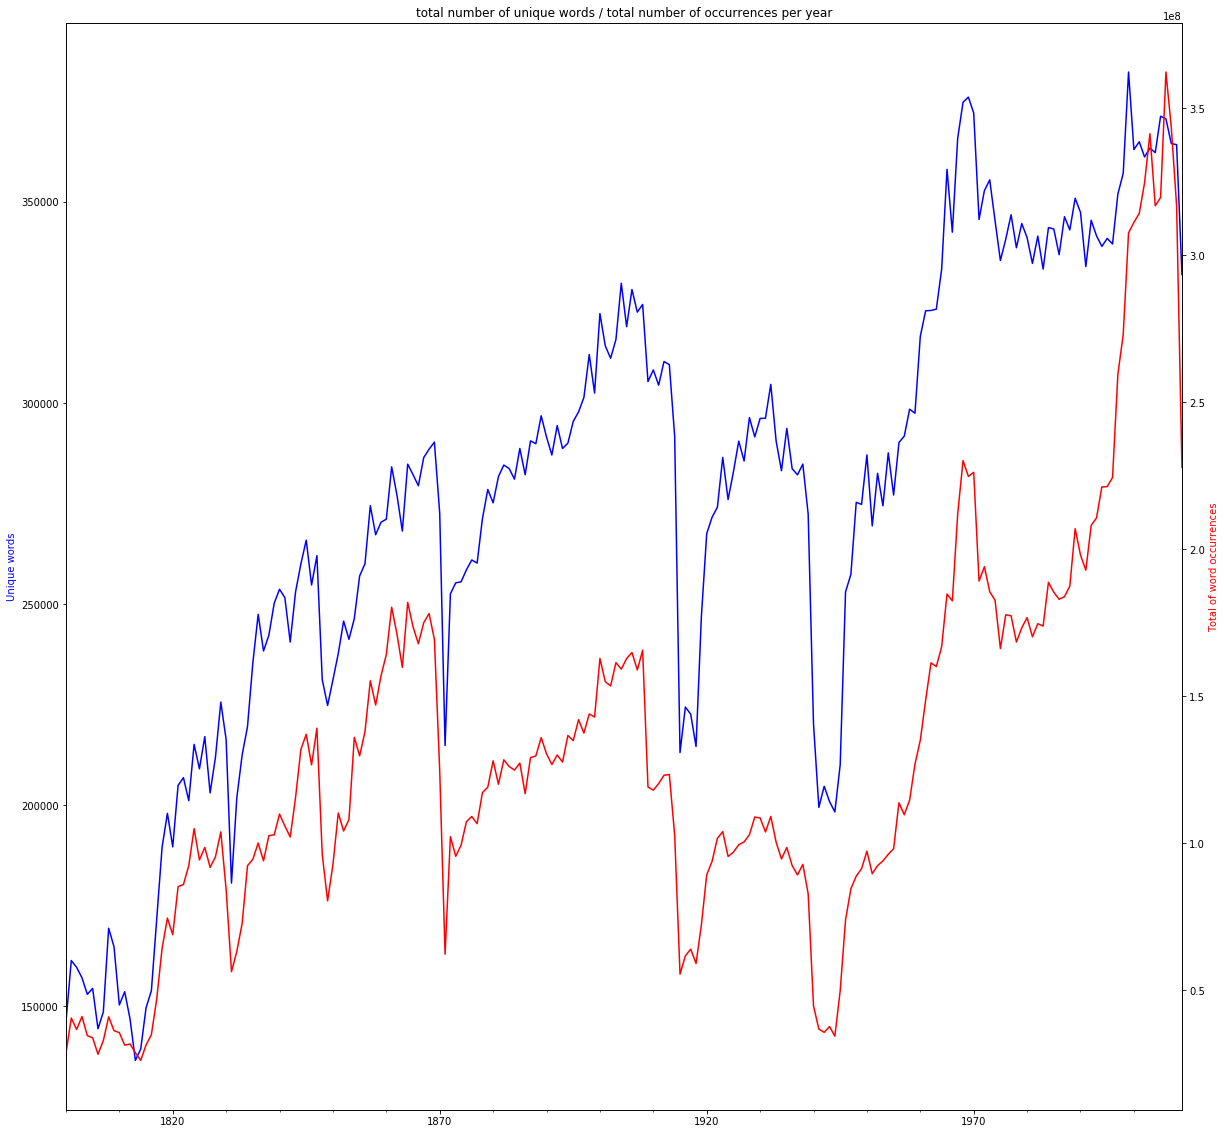

In [30]:
# on the same plot
fig, ax = plt.subplots(figsize = (20,20))
df1['uniquewords'].plot(ax=ax, color="blue")
ax.set_ylabel('Unique words', color='blue')
ax2 = ax.twinx()
df1['totalwordsocc'].plot(title='total number of unique words / total number of occurrences per year', ax=ax2, color="red")
ax2.set_ylabel('Total of word occurrences', color='red')

/Users/emmanuelcartier/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=657072.0, right=657072.0
  ax.set_xlim(left, right)
/Users/emmanuelcartier/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=657072.0, right=657072.0
  ax.set_xlim(left, right)


Text(0, 0.5, 'Total of word occurrences')

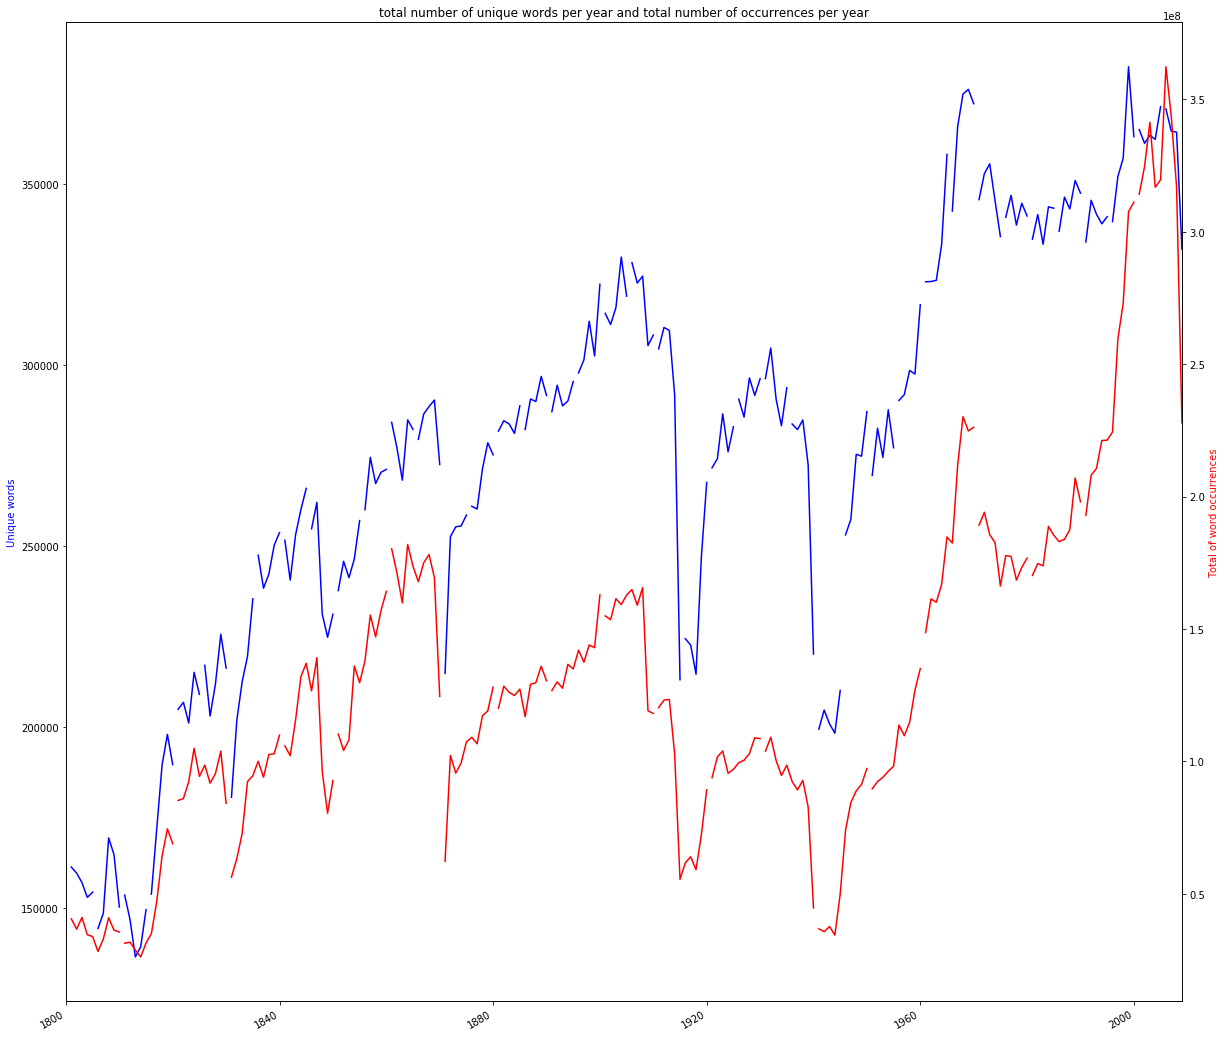

In [32]:
# resample by five years
fig, ax = plt.subplots(figsize = (20,20))
df1.resample('5A')['uniquewords'].plot(ax=ax, color="blue")
ax.set_ylabel('Unique words', color='blue')
ax2 = ax.twinx()
df1.resample('10A')['totalwordsocc'].plot(title='total number of unique words per year and total number of occurrences per year', ax=ax2, color="red")
ax2.set_ylabel('Total of word occurrences', color='red')

In [ ]:
# save to csv
df1.to_csv('google_ngrams_with_stats.csv')

In [ ]:
df1.T.to_csv('google_ngrams_with_stats2.csv')

In [33]:
df1.resample('10A').to_csv('google_fr_ngrams_1800-2010_10years.csv')
# [['uniquewords','totalwordsocc','RateUniqueOcc']]



AttributeError: 'DatetimeIndexResampler' object has no attribute 'to_csv'

# B. Focus on word evolution
## Relative frequency

In [6]:
# first get a copy of the orginal df (deep = True meansdfs are independent)
df2 = df.copy(deep=True)

# load totals of tokens per corpus year
totals = load_total_counts(19,1800,2009)

# calculate relative frequency for each column

for i in range(1800,2009):
    df2[str(i) + '_freqrel'] = (df2[str(i)] / totals[str(i)]) * 1000
    df2[str(i) + '_freqrel'] = (df2[str(i)] / totals[str(i)]) * 1000

# set total_freq for future analysis
df2['total_count'] = df.filter(regex=("^[0-9]{4}$")).apply(lambda x: x.sum(), axis=1)

# remove absolute frequency for df (relative frequency used for clustering and plotting)
df2 = df2.drop([str(i) for i in range(1800,2010)], axis=1)
df2.columns = df2.columns.str.replace('_freqrel', '')

# save this dataframe for future analysis
df2.to_csv('google_ngrams_with_freq_rel.csv')

print(df2.info())
print(df2.head(5))


<class 'pandas.core.frame.DataFrame'>
Index: 549653 entries, aab to зрения
Columns: 210 entries, 1800 to total_count
dtypes: float64(210)
memory usage: 884.8+ MB
None
           1800      1801      1802      1803      1804      1805  1806  \
string                                                                    
aab     0.00001  0.000000  0.000104  0.000029  0.000017  0.000017   0.0   
aaba    0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   0.0   
aabaab  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   0.0   
aabb    0.00001  0.000007  0.000000  0.000000  0.000008  0.000000   0.0   
aabccb  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   0.0   

            1807  1808  1809  ...      2000      2001          2002  \
string                        ...                                     
aab     0.000291   0.0   0.0  ...  0.000026  0.000008  7.324472e-06   
aaba    0.000000   0.0   0.0  ...  0.000005  0.000004  8.138302e-07   
aabaab  0.000000   0.0 

## Other measures : average, standard deviation, trend

string
des      1.358191e+09
que      9.097386e+08
une      7.327879e+08
dans     7.202522e+08
qui      7.135819e+08
est      5.263618e+08
avec     2.449233e+08
aux      2.165124e+08
cette    2.147857e+08
comme    2.010130e+08
Name: total_count, dtype: float64
string
des      2784.731435
que      2009.215599
qui      1554.758746
dans     1529.002229
une      1493.885575
est      1092.518241
avec      527.317896
cette     473.175008
aux       453.373390
comme     413.078411
Name: total_count_rel, dtype: float64
string
des      6.467577e+06
que      4.332088e+06
une      3.489466e+06
dans     3.429772e+06
qui      3.398009e+06
est      2.506485e+06
avec     1.166301e+06
aux      1.031012e+06
cette    1.022789e+06
comme    9.572050e+05
Name: average, dtype: float64
string
des      6.467577e+06
que      4.332088e+06
qui      3.398009e+06
dans     3.429772e+06
une      3.489466e+06
est      2.506485e+06
avec     1.166301e+06
cette    1.022789e+06
aux      1.031012e+06
comme    9.572050e+05


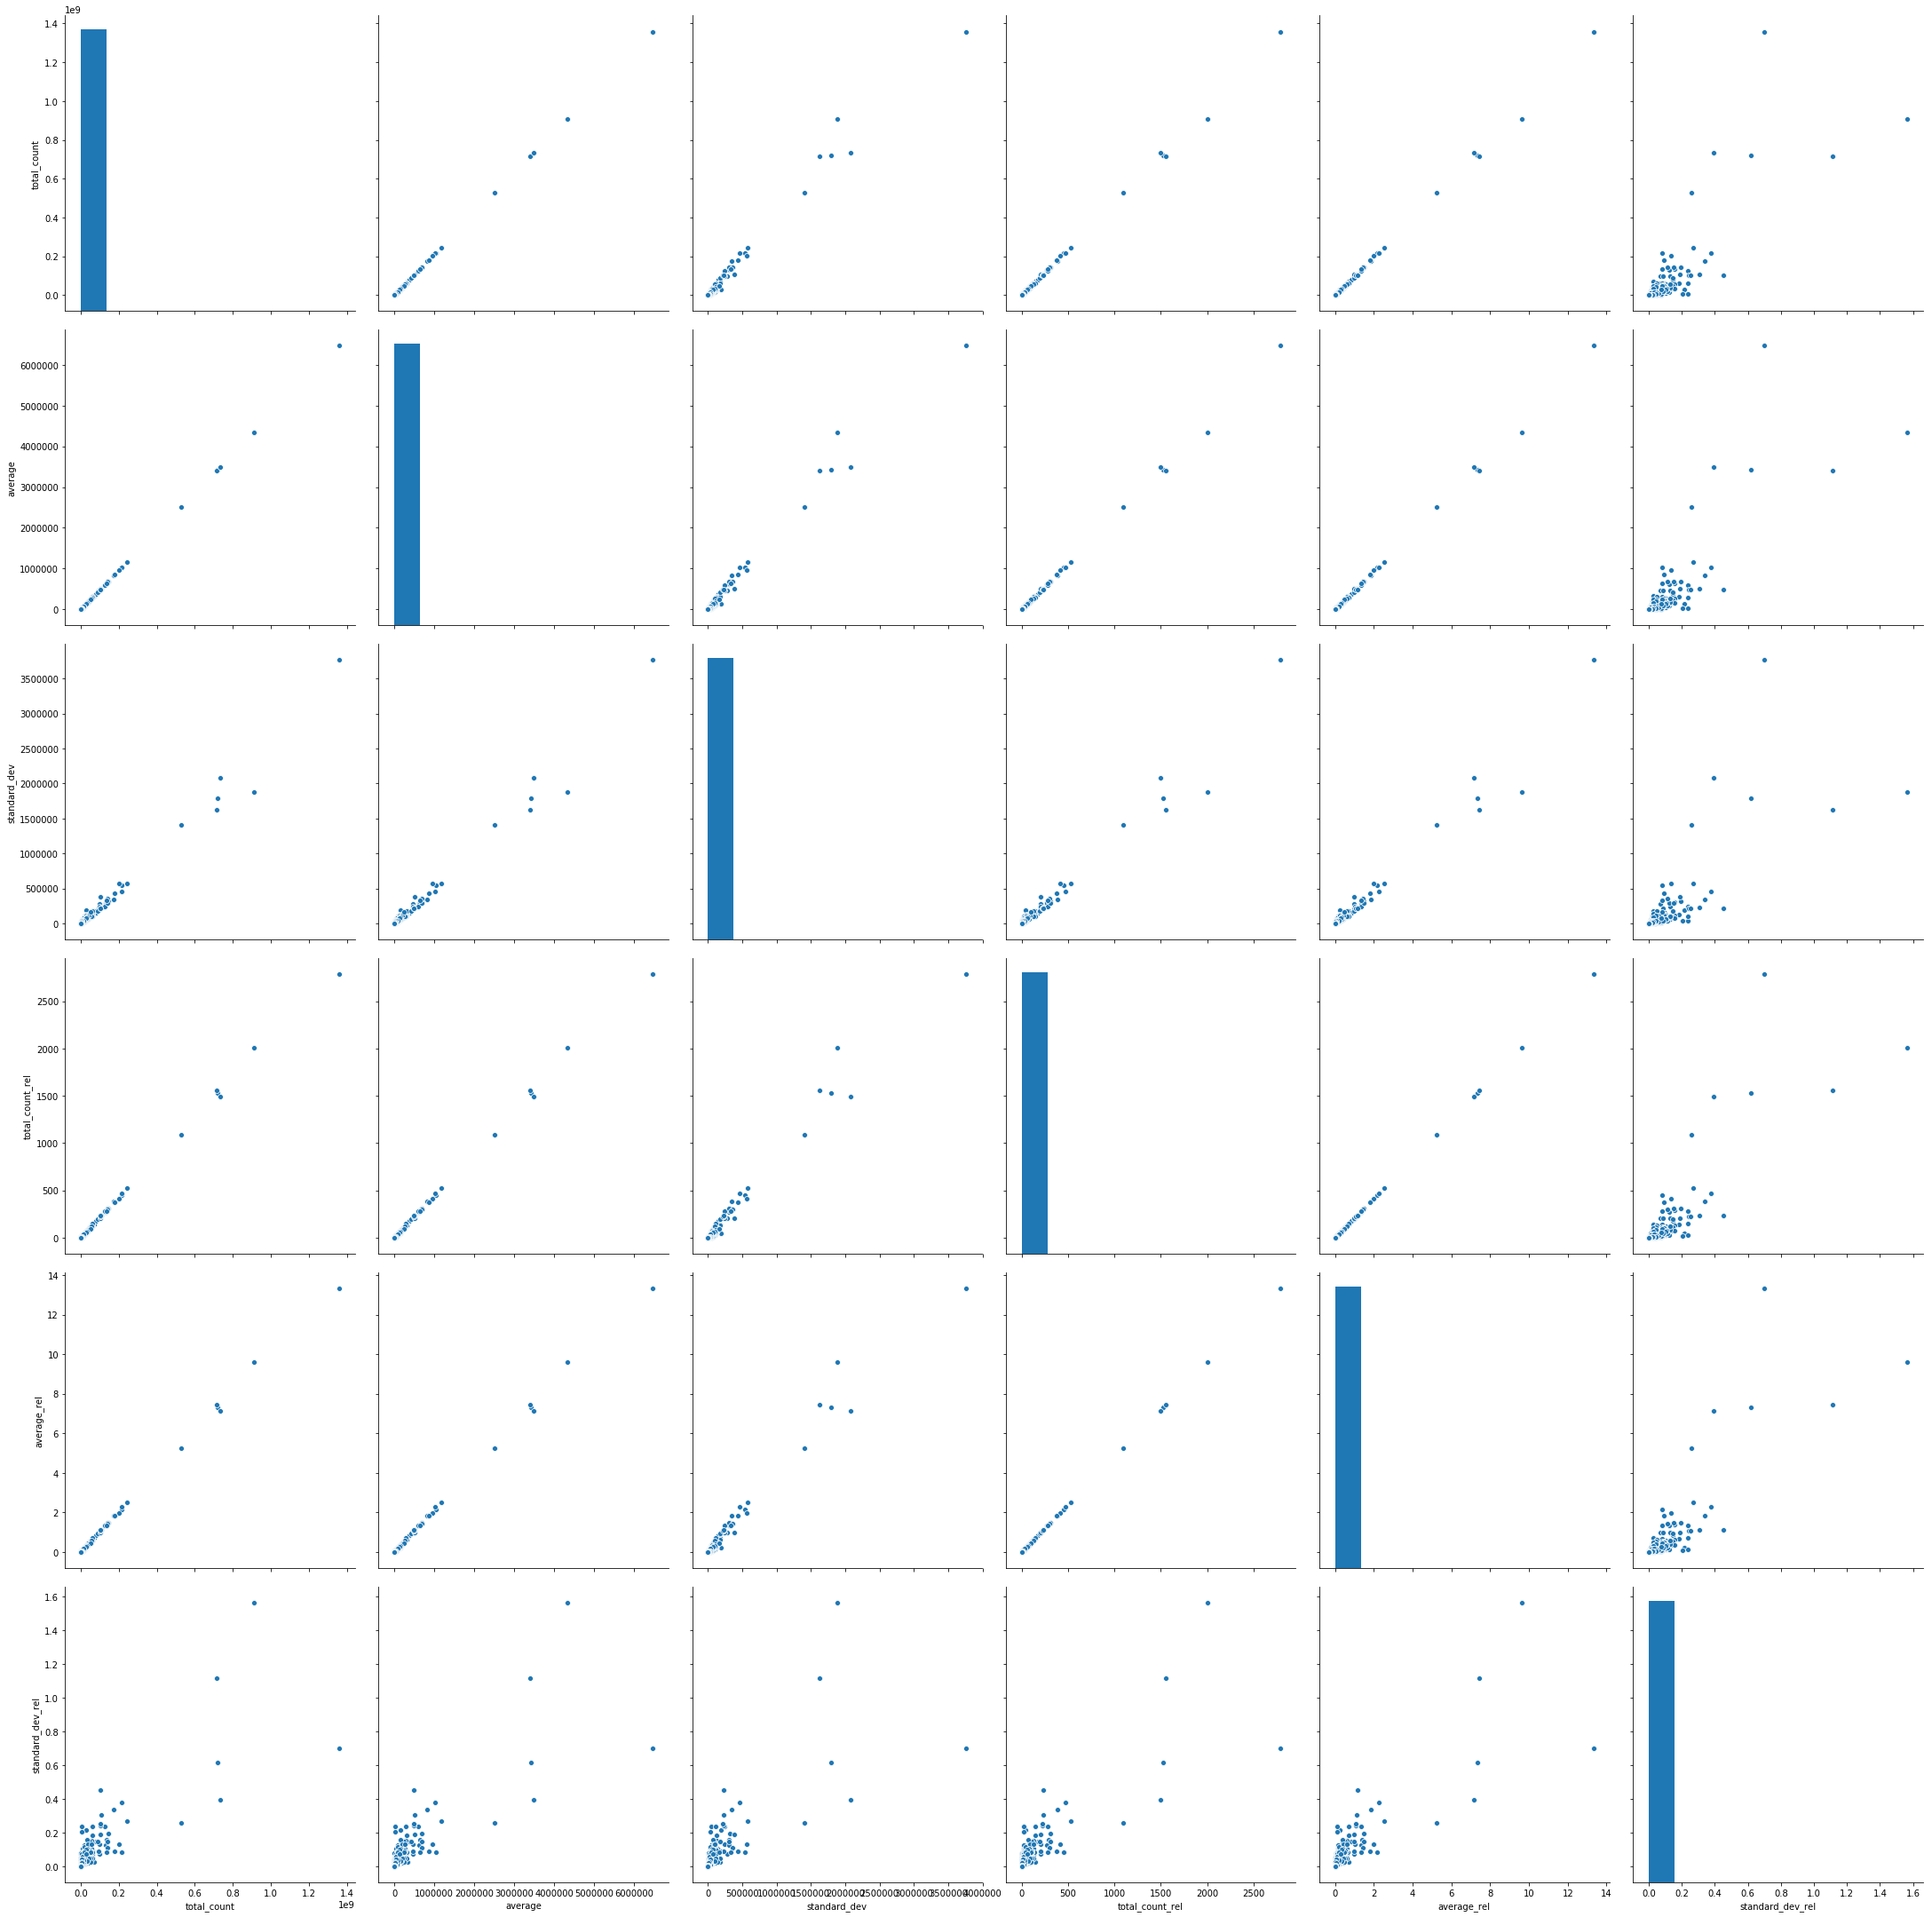

In [7]:

# now create additional columns for several measures
df2['total_count'] = df.filter(regex=("^[0-9]{4}$")).apply(lambda x: x.sum(), axis=1)
df2['average'] = df.filter(regex=("^[0-9]{4}$")).apply(lambda x: x.mean(), axis=1)
df2['standard_dev'] = df.filter(regex=("^[0-9]{4}$")).apply(lambda x: x.std(), axis=1)
df2['total_count_rel'] = df2.filter(regex=("^[0-9]{4}$")).apply(lambda x: x.sum(), axis=1)
df2['average_rel'] = df2.filter(regex=("^[0-9]{4}$")).apply(lambda x: x.mean(), axis=1)
df2['standard_dev_rel'] = df2.filter(regex=("^[0-9]{4}$")).apply(lambda x: x.std(), axis=1)

#print(df2.sort_values('total_count', ascending=False )['total_count'].head(100))
print(df2.sort_values('total_count', ascending=False )['total_count'].head(10))
print(df2.sort_values('total_count_rel', ascending=False )['total_count_rel'].head(10))
print(df2.sort_values('average', ascending=False )['average'].head(10))
print(df2.sort_values('average_rel', ascending=False )['average'].head(10))
print(df2.sort_values('standard_dev', ascending=False )['standard_dev'].head(10))
print(df2.sort_values('standard_dev_rel', ascending=False )['standard_dev'].head(10))
#df2.to_csv('fre-all-statistics.csv')
print(df2[['total_count','average','standard_dev',
                  'total_count_rel','average_rel','standard_dev_rel']].describe())


In [ ]:
# save dataframe
print("Saving dataframe with all stats : ./fre-1800-2010-all-statistics.csv")


Generating absolute frequency pairplots...
Done. Saving plot to ./fre-1800-2010_features_correlations.png
Done. Generating relative frequency pairplots...
Done. Saving plot to ./fre-1800-2010_features_correlations_rel.png


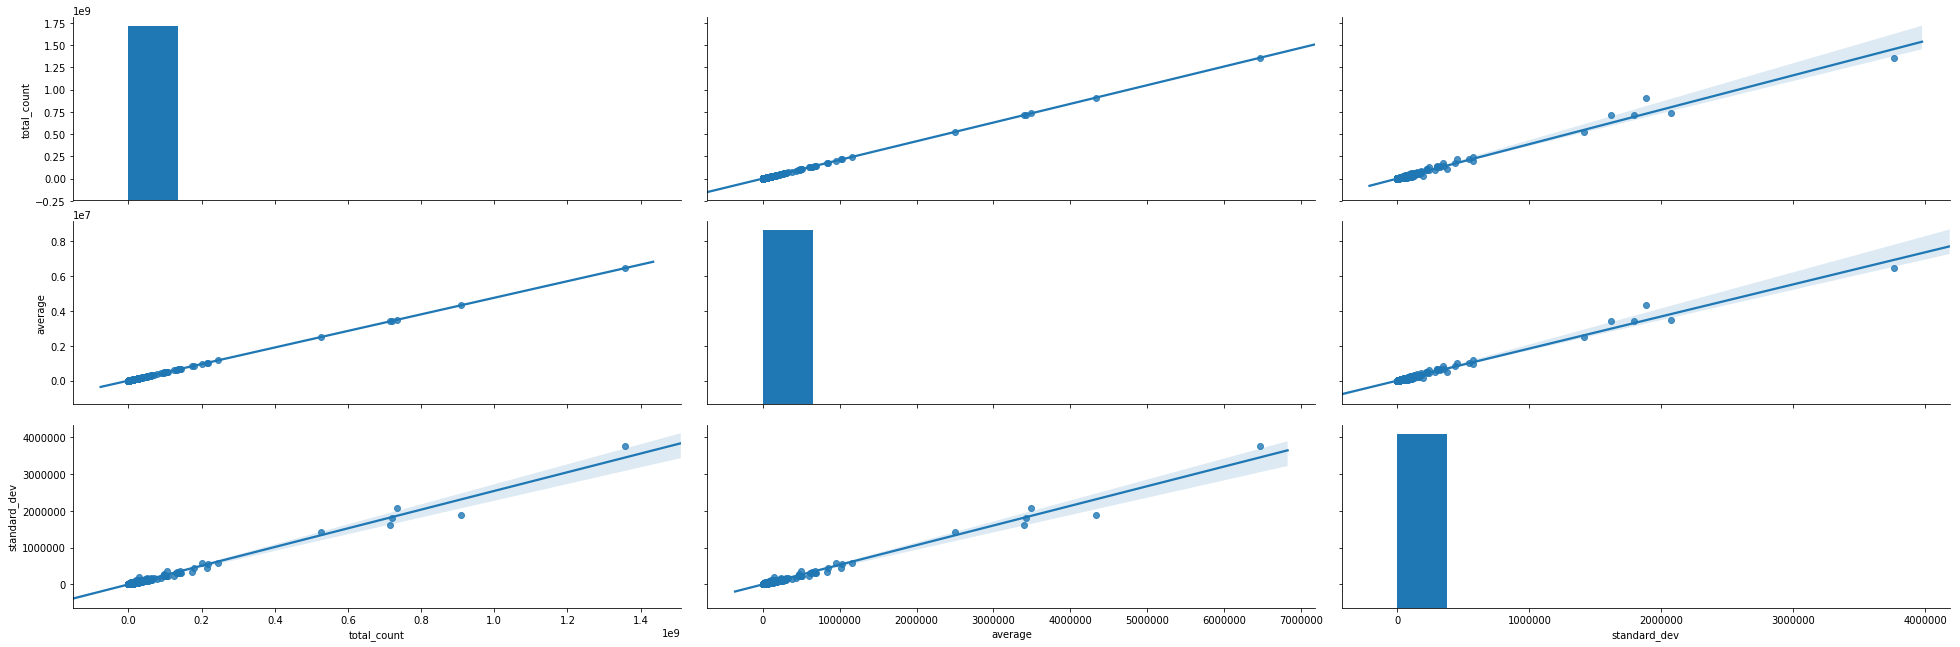

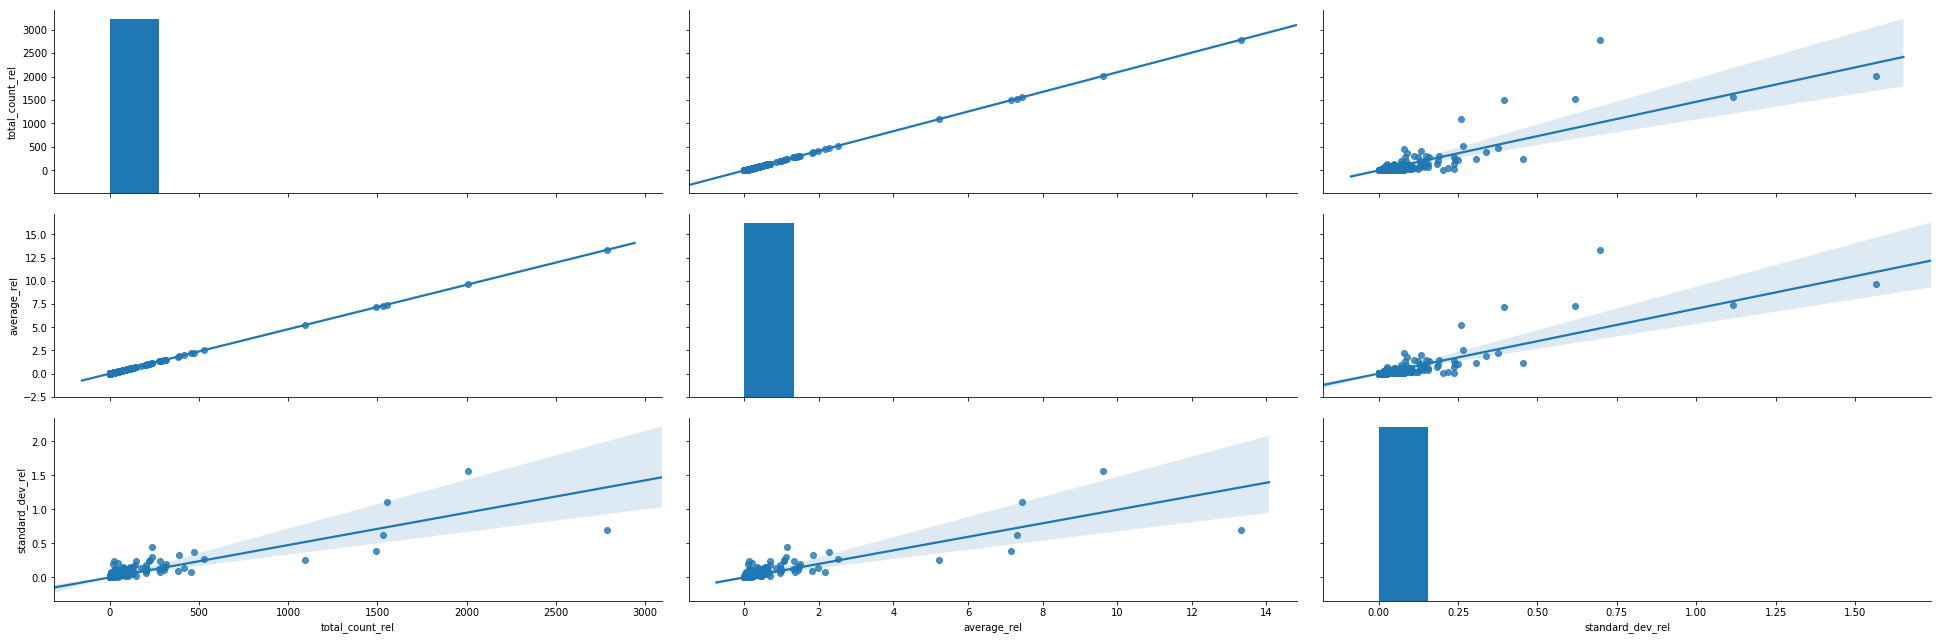

In [10]:
# pair plots
print("Generating absolute frequency pairplots...")
sns_plot = sns.pairplot(df2[['total_count','average','standard_dev']],height=3,aspect=3,kind="reg")
print("Done. Saving plot to ./fre-1800-2010_features_correlations.png")
sns_plot.savefig("fre-1800-2010_features_correlations.png")
print("Done. Generating relative frequency pairplots...")
sns_plot = sns.pairplot(df2[['total_count_rel','average_rel','standard_dev_rel']],height=3,aspect=3,kind="reg")
print("Done. Saving plot to ./fre-1800-2010_features_correlations_rel.png")
sns_plot.savefig("fre-1800-2010_features_correlations_rel.png")


In [26]:
# resampling to get year periods into account
df3 = df2.filter(regex=("^[0-9]{4}$")).T
df3.index = pd.to_datetime(df3.index)
df3.info()
df3.resample('10A').mean()
df3.info()
df3.head(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 1800-01-01 to 2008-01-01
Columns: 549653 entries, aab to зрения
dtypes: float64(549653)
memory usage: 876.4 MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 1800-01-01 to 2008-01-01
Columns: 549653 entries, aab to зрения
dtypes: float64(549653)
memory usage: 876.4 MB


string,aab,aaba,aabaab,aabb,aabccb,aable,aabne,aac,aacc,aaccepté,...,значительное,значительной,значительную,значительные,значительный,значительных,зон,зоне,зоны,зрения
1800-01-01,0.000010,0.0,0.0,0.000010,0.0,0.000010,0.000000,0.000031,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1801-01-01,0.000000,0.0,0.0,0.000007,0.0,0.000007,0.000000,0.000029,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1802-01-01,0.000104,0.0,0.0,0.000000,0.0,0.000000,0.000008,0.000024,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1803-01-01,0.000029,0.0,0.0,0.000000,0.0,0.000007,0.000000,0.000014,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1804-01-01,0.000017,0.0,0.0,0.000008,0.0,0.000000,0.000000,0.000025,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Appendix : the same with data from Google already processed (total occurrences per year)

## Now plot again with relative frequencies
divide unique words by total number of words in every year corpus and normalize (by multiplying by 1000)

In [ ]:
# load totals of tokens per corpus year
#totals = load_total_counts(19,1900,2009)
#print(totals)
df1['year'] = df1.index.to_period('Y').strftime('%Y')
#print(df1[['year','total']].head())

def get_total_year(row): 
    return totals[row['year']] * 1000
#row={}
#row['year']='2000'
#print(get_total_year(row))

# calculate relative frequency for each row (ie year)
df1['total_rel'] = df1.apply(lambda row : get_total_year(row), axis=1)


In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
#fig, ax = plt.figure(figsize = (20,20))
df1['total'].plot(kind="line", ax=ax,rot=90, color="red", #logy=True,
                 title="Evolution du vocabulaire (formes uniques et normalisées)") 
ax.set_ylabel('Formes uniques', color='red')
ax2 = ax.twinx()
df1['total_rel'].plot(kind="line", ax=ax2,rot=90, color="blue") #, logy=True
ax2.set_ylabel('Formes uniques / nombre total de formes', color='blue')


In [ ]:

# remove absolute frequency for df (relative frequency used for clustering and plotting)
#df = df.drop([str(i) for i in range(1900,2010)], axis=1)
#df.columns = df.columns.str.replace('_freqrel', '')
#df.to_csv('./fre-all_1gram_relfreq.csv')
#exit()

# total counts for years and years_freqrel
# df3['full_count'] = df3.apply(lambda x: x.sum(), axis=1)
#standard variation, mean, median,
df['total_count'] = df.filter(regex=("^....$")).apply(lambda x: x.sum(), axis=1)
df['total_rel_count'] = df.filter(regex=("_freqrel")).apply(lambda x: x.sum(), axis=1)
df['average'] = df.filter(regex=("_freqrel")).apply(lambda x: x.mean(), axis=1)
df['standard_dev'] = df.filter(regex=("_freqrel")).apply(lambda x: x.std(), axis=1)
#print(df2.sort_values('total_count', ascending=False )['total_count'].head(100))
print(df.sort_values('total_rel_count', ascending=False )['total_rel_count'].head(10))
print(df.sort_values('average', ascending=False )['average'].head(10))
print(df.sort_values('standard_dev', ascending=False )['standard_dev'].head(10))
#df2.to_csv('fre-all-statistics.csv')
print(df.describe())
df['standard_dev'].plot(kind='hist') # , bins=50
plt.show()
df['average'].plot(kind='hist')
plt.show()
#exit()

# plotting specific evolution for a given lexical unit
for i in range(1,10):
    plotMovingAverage(df.iloc[[random.randint(1,10000)]].T, 5, plot_intervals=True, plot_anomalies=True)

exit()




#print(words)
#exit()
for w in words:
    plot_absolute_counts(w, 'french', smoothing=0, start_year=1900, end_year=2010, log_scale=True,save=True, show=False)

In [ ]:

def plot_distribution(df, field,bins=100):
    plt.figure(figsize=(15,5))
    df.groupby([field]).count().plot(kind='hist',log=True, legend=False)
#    plt.hist(df[field], color = 'blue', edgecolor = 'black',log=True,
             #bins = [0,100,200,300,400,500,600,700, 800,900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
#             ) # int(100/ bins)
    
    # seaborn histogram
    #sns.distplot(df[field], hist=True, kde=False, 
    #             bins=int(180/ bins), color = 'blue',
    #             hist_kws={'edgecolor':'black'})
    # Add labels
    plt.title('Histogram of distribution of : ' + field)
    plt.xlabel('Figures')
    plt.ylabel('Number of elements') 
    plt.show()

def plot_absolute_counts(token, corpus='english', smoothing=0, start_year=1800, end_year=2000, log_scale=False, save=False, show=False):
    '''
    Valid corpora names are:
    'english', 'american english', 'british english', 'english fiction'
    'chinese', 'french', 'german', 'hebrew', 'italian', 'russian', 'spanish'
    
    
    '''
    # Load absolute counts of the totken
    absolute_counts = retrieve_absolute_counts(token, corpus, smoothing, start_year, end_year)

    years = range(start_year, start_year + len(absolute_counts))

    plt.rcParams['figure.figsize'] = (15,8)
    plt.rcParams['font.size'] = 10
    ax= plt.axes()
    if log_scale:
        ax.set_yscale('log')
    plt.plot(years, absolute_counts, label = '{}'.format(token))
    title = 'Absolute Counts of "{}" in the "{}" corpus with smoothing={}.'.format(token, corpus,smoothing)
    if log_scale:
        title += ' Log Scale.'
    plt.title(title)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

    legend_title = ax.get_legend().get_title()
    legend_title.set_fontsize(15)
    if save==True:
        plt.savefig('./'+token + '_'+ corpus + '.png')
    if show == True:
        plt.show()
    plt.close()

def print_absolute_counts(token, corpus='english', smoothing=0, start_year=1800, end_year=2000):
    '''
    Prints out the absolute counts (instead of plotting them)
    Useful to get the exact 
    '''

    absolute_counts = retrieve_absolute_counts(token, corpus, smoothing, start_year, end_year)
    print ('Absolute Counts for: {}'.format(token))
    for i in range(len(absolute_counts)):
        print ('{}: {}'.format(start_year + i, int(absolute_counts[i])))




# plotMovingAverage(ads_anomaly, 4, plot_intervals=True, plot_anomalies=True)
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    #matplotlib.rcParams.update({'font.size': 10})
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title(str(list(series)) + "\nMoving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.xticks(rotation='vertical')
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show()

########### main
    
#read_onegram_files()
#exit()





